In [ ]:
import math

λ1 = 0.1
λ2 = 0.2
t_obsl1 = float(input("Введите среднее время устранения неисправностей первой категории t_obsl1: "))
t_obsl2 = float(input("Введите среднее время устранения неисправностей второй категории t_obsl2: "))

μ1 = 1/t_obsl1
μ2 = 1/t_obsl2
y1 = λ1/μ1;
y2 = λ2/μ2;
y = y1+y2;
t_och1 = y1/(μ1*(1-y1))
t_syst1 = t_och1+t_obsl1
a = 1/μ2
b = ((μ2/μ1) * (y1/(1-y)))+y
t_och2 = a*b/(1-y)
t_syst2 = t_och2+a

print("\ny1 -", round(y1, 2),
      "\ny2 -", round(y2, 2),
      "\ny -", round(y, 2),
      "\nСреднее время пребывания в очереди заявок, обладающих приоритетом t_och1 -", round(t_och1, 2),
      "\nСреднее время пребывания в отключенном состоянии потребителей I категории t_syst1 -", round(t_syst1, 2),
      "\nСреднее время ожидания в очереди заявки, не обладающей приоритетом t_och2 -", round(t_och2, 2),
      "\nСреднее время пребывания в системе заявки, не обладающей приоритетом t_syst2 -", round(t_syst2, 2)
)

Введите среднее время устранения неисправностей первой категории t_obsl1: 1
Введите среднее время устранения неисправностей второй категории t_obsl2: 2.5

y1 - 0.1 
y2 - 0.5 
y - 0.6 
Среднее время пребывания в очереди заявок, обладающих приоритетом t_och1 - 0.11 
Среднее время пребывания в отключенном состоянии потребителей I категории t_syst1 - 1.11 
Среднее время ожидания в очереди заявки, не обладающей приоритетом t_och2 - 4.38 
Среднее время пребывания в системе заявки, не обладающей приоритетом t_syst2 - 6.88


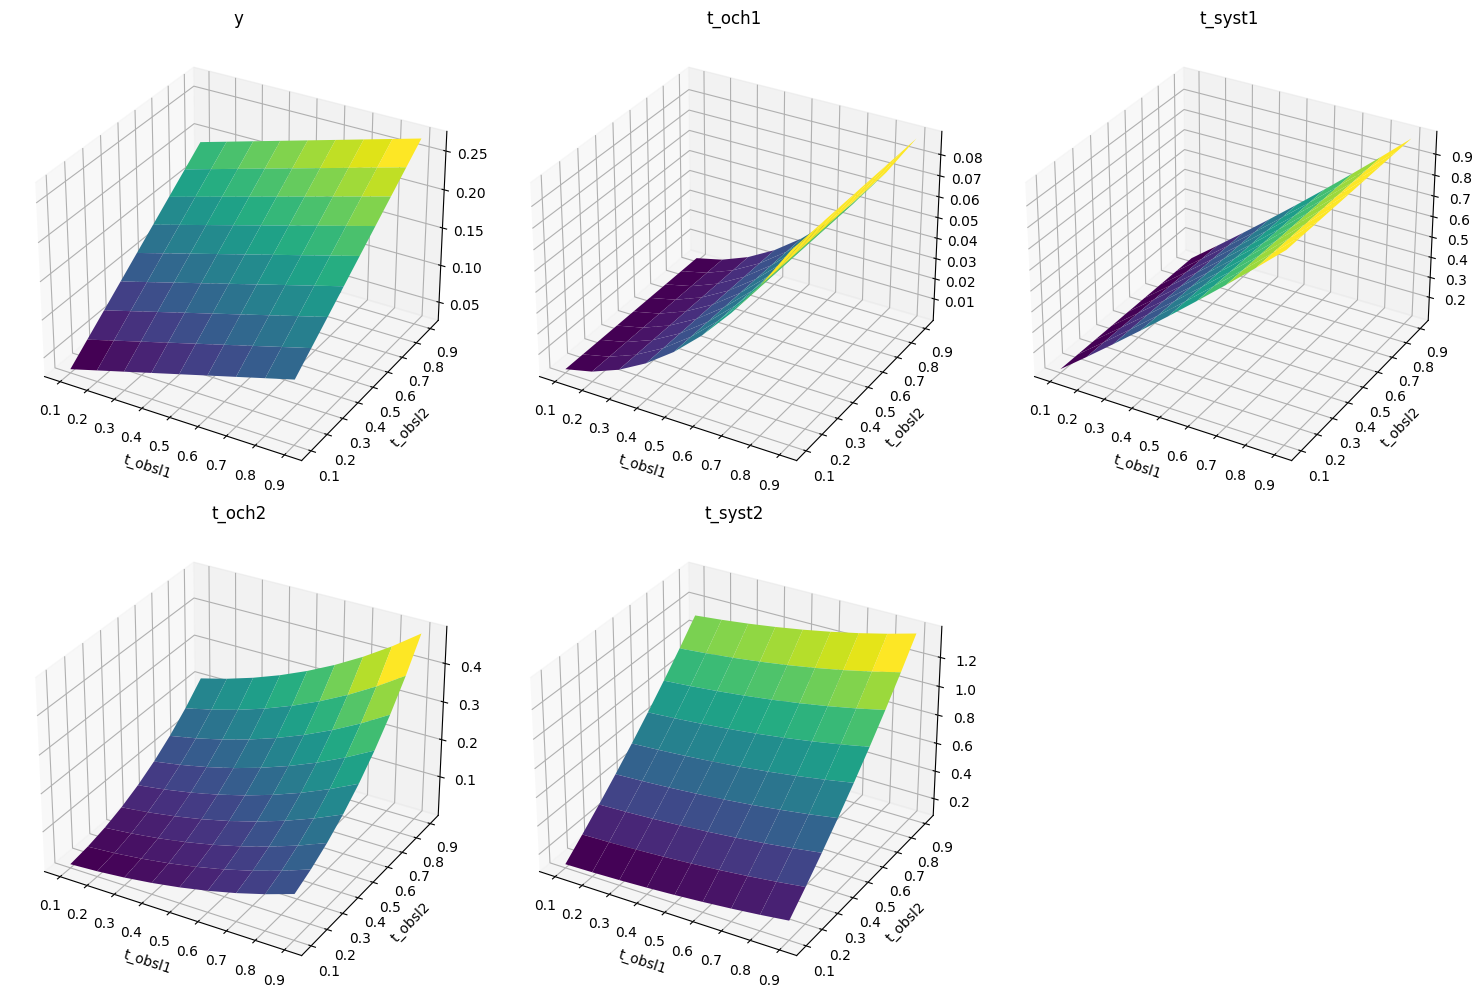

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

λ1 = 0.1
λ2 = 0.2

def get_params(t_obsl1, t_obsl2):
  μ1 = 1/t_obsl1
  μ2 = 1/t_obsl2
  y1 = λ1/μ1;
  y2 = λ2/μ2;
  y = y1+y2;
  t_och1 = y1/(μ1*(1-y1))
  t_syst1 = t_och1+t_obsl1
  a = 1/μ2
  b = ((μ2/μ1) * (y1/(1-y)))+y
  t_och2 = a*b/(1-y)
  t_syst2 = t_och2+a
  return y, t_och1, t_syst1, t_och2, t_syst2

Nr = np.arange(0.1, 1, 0.1)
Mr = np.arange(0.1, 1, 0.1)
N, M = np.meshgrid(Nr, Mr)

y, t_och1, t_syst1, t_och2, t_syst2 = np.vectorize(get_params)(N, M)
values_list = [y, t_och1, t_syst1, t_och2, t_syst2]
names = ['y',
         't_och1',
         't_syst1',
         't_och2',
         't_syst2']

fig = plt.figure(figsize=(15, 15))

for i, values in enumerate(values_list):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    z_values = values
    ax.plot_surface(N, M, z_values, cmap='viridis')
    ax.set_xlabel('t_obsl1')
    ax.set_ylabel('t_obsl2')
    ax.set_title(names[i])

plt.tight_layout()
plt.show()